<a href="https://colab.research.google.com/github/rakshaa2000/30-Days-of-ML/blob/main/Wine_Quality_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project classifies wine of "quality" greater than 7 as "good" quality wine and less than 7 as "bad" quality.

This imports the necessary libraries for the execution of linear regression on the dataset.

In [23]:
# importing necessary libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

The code below helps us to import the dataset from Local Computer to Google Colab

In [4]:
from google.colab import files
uploaded = files.upload()

Saving wineQualityRed_train.csv to wineQualityRed_train.csv
Saving wineQualityRed_test.csv to wineQualityRed_test.csv


The training and test dataset are different. We first read and format the training data set.

In [5]:
features =["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
df = pd.read_csv('wineQualityRed_train.csv', sep=';', names=features, header=0)
df = pd.DataFrame(df)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.0026,3.12,0.66,9.2,5
1,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,8
2,10.6,0.36,0.59,2.2,0.152,6.0,18.0,0.9986,3.04,1.05,9.4,5
3,10.6,0.36,0.60,2.2,0.152,7.0,18.0,0.9986,3.04,1.06,9.4,5
4,10.6,0.44,0.68,4.1,0.114,6.0,24.0,0.9970,3.06,0.66,13.4,6


We now label the wines with quality less than 7 as bad and greater than or equal to 7 as good.

In [7]:
bins = [0,7,10]
labels= ['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.0026,3.12,0.66,9.2,bad
1,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,good
2,10.6,0.36,0.59,2.2,0.152,6.0,18.0,0.9986,3.04,1.05,9.4,bad
3,10.6,0.36,0.60,2.2,0.152,7.0,18.0,0.9986,3.04,1.06,9.4,bad
4,10.6,0.44,0.68,4.1,0.114,6.0,24.0,0.9970,3.06,0.66,13.4,bad


We encode the label into two values, 0 and 1.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


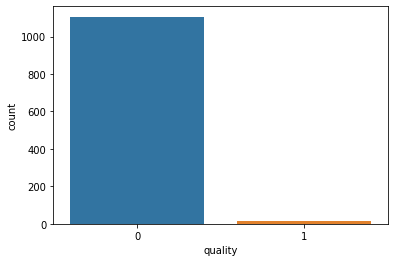

In [10]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df.quality)
sns.countplot(df['quality'])

We now format the test dataset to assess the accuracy in the model. Just like the training dataset, the test dataset is also labelled and encoded.

In [27]:
df_test = pd.read_csv('wineQualityRed_test.csv', sep=';', names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"], header=0)
df_test = pd.DataFrame(df_test)
bins = [0,7,10]
labels= ['bad','good']
df_test['quality']=pd.cut(df_test['quality'],bins=bins, labels=labels)
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


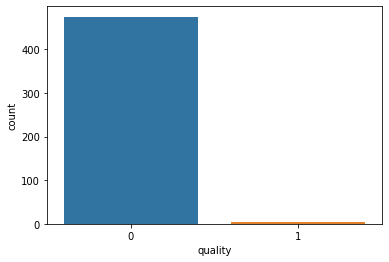

In [31]:
le = LabelEncoder()
df_test['quality'] = le.fit_transform(df_test.quality)
sns.countplot(df_test['quality'])

This snippet trains the Logistic regression model and calculates the accuracy of the model.

In [32]:
features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
X_train = df[features]
X_test = df_test[features]
Y_train = np.array(df['quality'])
Y_test = np.array(df_test['quality'])

#Standardise data for better results

scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [33]:
regressor=LogisticRegression(solver='saga', multi_class='multinomial',max_iter=1000)
reg = regressor.fit(X_train,Y_train)
y_pred = regressor.predict(X_test)
score=reg.score(X_test,Y_test)
# Printing coefficients and intercept
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
print('Accuracy of the model: \n', str(score))

Coefficients: 
 [[-0.09823097  0.12060607  0.28672701 -0.34243458 -0.30082256  0.13266461
  -0.48764249 -0.3441684  -0.33060438  0.38854371  0.46044627]]
Intercept: 
 [-3.23032897]
Accuracy of the model: 
 0.9895833333333334
